In [46]:
!pip install pandas numpy matplotlib scikit-learn tensorflow Pillow

In [48]:
from tensorflow.keras.datasets import mnist
from matplotlib import pyplot as plt
import random
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from PIL import Image, ImageOps

# Ερώτημα 1

In [4]:
( x_train, y_train ), ( x_test, y_test ) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 50s 4us/step


# Ερώτημα 2

(60000, 28, 28)

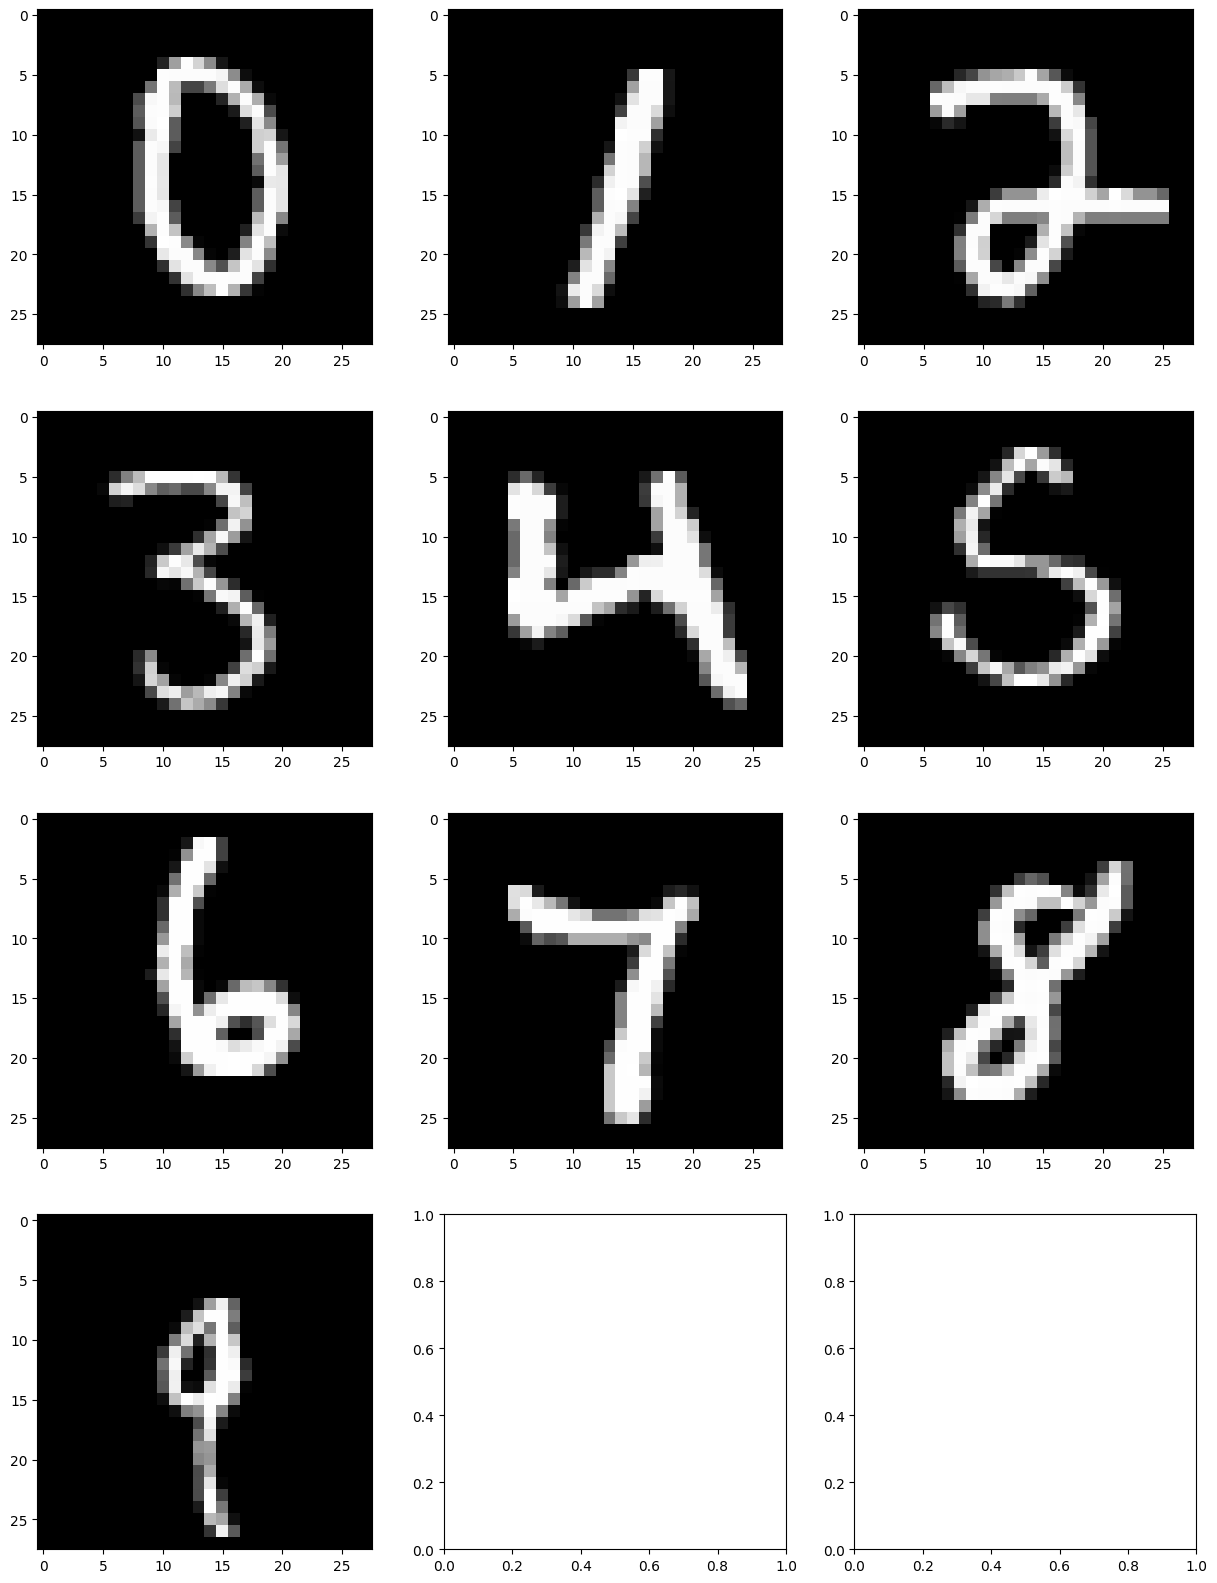

In [13]:
picture_indexes = list( range( 10 ) )
dict = {}
for i in range( len( x_train ) ):
	if y_train[i] in dict:
		dict[y_train[i]].append( i )
	else:
		dict[y_train[i]] = [i]

fig, ax = plt.subplots( 4, 3, figsize=(15,20) )
for i in range( 10 ):
	row = i//3
	column = i % 3

	ax[row][column].imshow( x_train [random.choice( dict[i] )], cmap='gray', vmin=0, vmax=255 )


x_train.shape





# Ερώτηση 3

Οι εικόνες ειναι 28 επί 28. Σε αυτές τις εικόνες μας ενδιαφέρουν μόνο οι τιμές του άσπρου χρώματος.

# Ερώτηση 4

In [21]:
x_train_vectorized = np.zeros( ( x_train.shape[0], x_train.shape[1]*x_train.shape[2] ))
x_test_vectorized = np.zeros( ( x_test.shape[0], x_test.shape[1]*x_test.shape[2] ))

for i in range( x_train.shape[0] ):
	x_train_vectorized[i] = x_train[i].ravel()

for i in range( x_test.shape[0] ):
	x_test_vectorized[i] = x_test[i].ravel()



# Ερώτηση 5

In [ ]:
model = KNeighborsClassifier( 10, n_jobs = -1 )
# x_train_vectorized.shape
model.fit( x_train_vectorized, y_train )

y_predicted = model.predict( x_test_vectorized )

acc = accuracy_score( y_test, y_predicted )

print( f"Accuracy score is {acc*100:.2f}%" )



Accuracy score is 96.91%


# Ερώτημα 6

In [55]:
x_train_vectorized_normalized = x_train_vectorized[:]/255.
x_test_vectorized_normalized = x_test_vectorized[:]/255.

model = KNeighborsClassifier( 10, n_jobs = -1 )
# x_train_vectorized.shape
model.fit( x_train_vectorized_normalized, y_train )

y_predicted = model.predict( x_test_vectorized_normalized )

acc = accuracy_score( y_test, y_predicted )
# acc = accuracy_score( y_predicted, y_test )

print( f"Accuracy score is {acc*100:.2f}%" )



Accuracy score is 96.65%


Το accuracy score βγαίνει ακριβώς το ίδιο. Το περίμεναμε αυτό καθώς αν διαιρέσουμε με το 255 τότε πάλι θα έχει τα ακριβώς ίδια δείγματα κοντά.

# Ερώτημα 7

In [ ]:
im1 = Image.open(r"./number_5.png" ).convert( 'L' )

# applying grayscale method 
number_5 = np.array(im1.getdata(), dtype = np.uint8 )

number_5 = number_5.ravel()/255.

t = model.predict( [number_5] )
print( f"The predicted number is correct: {t}" )


[5]
